# Project: Investigate a Dataset (NETFLIX DATASET)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Netflix Inc. is one of the top  subscription streaming service and production companys. This project aims to perform exploratory data analysis on netflix data. The netflix dataset used for this analysis is made up of over 8800 movies and 11 features.

In [61]:
# importing neccessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [62]:
# reading the dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [63]:
# creatring a copy of the dataset to do cleaning on
df_clean = df.copy()
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [64]:
# checking info on the dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


> There are eleven features in the dataset some of which have a few missing values (director, cast, country, date_added, duration & rating)

### Data Cleaning (Handeling of Missing Values)

In [65]:
# taking a value count of the director's column
df_clean.director.value_counts()

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
                          ..
Sean Menard                1
Philip Marlatt             1
Hong Won-ki                1
Felix Thompson             1
Marek Losey                1
Name: director, Length: 4528, dtype: int64

In [66]:
# handling missing data in the director column
print(f'There are {df_clean.director.isna().sum()} rows with missing values for director.')
df_clean[df_clean['director'].isna()].head(10)

There are 2634 rows with missing values for director.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV Shows","Sicily boasts a bold ""Anti-Mafia"" coalition. But what happens when those trying to bring down organized crime are accused of being criminals themselves?"
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job offer a rare glimpse into the complex and challenging inner workings of four major crime investigations.
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton, Antoinette Robertson, John Patrick Amedori, Ashley Blaine Featherson, Marque Richardson, Giancarlo Esposito",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas","Students of color navigate the daily slights and slippery politics of life at an Ivy League college that's not nearly as ""post-racial"" as it thinks."
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri, Samadhi Zendejas, Eduardo Yáñez, Sonya Smith, Alejandro Camacho, Azela Robinson, Uriel del Toro, Géraldine Bazán, Gabriela Roel, Marcus Ornellas",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV Dramas",Strangers Diego and Isabel flee their home in Mexico and pretend to be a married couple to escape his drug-dealing enemies and her abusive husband.
19,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adrián Lastra, Francesc Garrido, Stefan Weinert, Julia Möller, Alicia Chojnowski",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Shows, TV Action & Adventure","In the 1960s, a Holocaust survivor joins a group of self-trained spies who seek justice against Nazis fleeing to Spain to hide after WWII."
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Darcan, Kaan Taşaner, Esra Bilgiç, Osman Soykut, Serdar Deniz, Cengiz Coşkun, Reshad Strik, Hande Subaşı",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure, TV Dramas","When a good deed unwittingly endangers his clan, a 13th-century Turkish warrior agrees to fight a sultan's enemies in exchange for new tribal land."
25,s26,TV Show,Love on the Spectrum,NaN,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV","Finding love can be hard for anyone. For young adults on the autism spectrum, exploring the unpredic

There are too many rows with missing values to drop this column. I will just be replacing the missing values with "No information"

In [67]:
# replacing nan values with "No information"
df_clean.director.fillna('No information',inplace=True)
display(df_clean.director.isna().sum())

0

In [68]:
# handling missing values in cast and country coulmns
print(f'{round(df_clean.cast.isna().sum()/len(df_clean)*100,2)}% of the values in the cast column are missing')
print(f'{round(df_clean.country.isna().sum()/len(df_clean)*100,2)}% of the values in the country column are missing')

9.37% of the values in the cast column are missing
9.44% of the values in the country column are missing


About 9% of values in the both columns are missing, this number is too high to drop those columns, replacing the nan values with "No Information" looks like the only option.

In [69]:
# replacing nan values wiht "No information"
df_clean.cast.fillna('No information',inplace=True)
df_clean.country.fillna('No information',inplace=True)
df_clean[['cast','country']].isna().sum()

cast       0
country    0
dtype: int64

In [74]:
#dropping rows with missing values in date_added, rating and duration
has_date = df_clean['date_added'].notnull()
has_rating = df_clean['rating'].notnull()
has_duration = df_clean['duration'].notnull()

df_clean = df_clean[has_date & has_rating & has_duration]

In [75]:
#checking for missong values
df_clean.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [114]:
# splitting the duration column into two
df_clean[['duration','duration_type']] = df_clean['duration'].str.split(expand=True)

In [117]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No information,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",min
1,s2,TV Show,Blood & Water,No information,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",No information,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",Season
3,s4,TV Show,Jailbirds New Orleans,No information,No information,No information,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",Season
4,s5,TV Show,Kota Factory,No information,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",Seasons


### Correcting Wrong Data Types

In [123]:
# checking data types of the columns
df_clean.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
duration_type            object
dtype: object

The date_added column should be of type datetime. The other columns have the correct data type.

In [125]:
#changing date added to type datetime
df_clean.date_added = pd.to_datetime(df_clean.date_added)


In [126]:
#changing duration datatype to integer
df_clean.duration = df_clean.duration.astype('int')
df_clean.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                  int32
listed_in                object
description              object
duration_type            object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


In [127]:
#setting the base color for our plots
base_color = sns.color_palette()[0]

### Univariate Exploration

#### What is the Most Popular Type of Show?

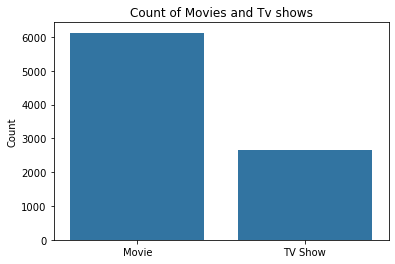

In [128]:
#using a countplot to check most popular show type
sns.countplot(x='type',data=df_clean,color=base_color)
plt.xlabel(None)
plt.ylabel('Count')
plt.title('Count of Movies and Tv shows');

#### What are the Top 10 Countries?

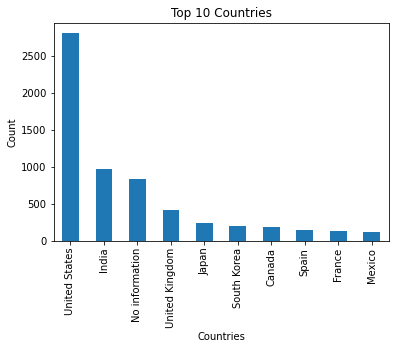

In [129]:
# ploting the top countries in a bar chart
df_clean.country.value_counts().head(10).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries');

### How is the Duration of Movies Distributed?

In [135]:
# creating a dataframe for just movies
df_movie = df_clean[df_clean['type'] == 'Movie']

In [136]:
df_movie.duration.describe()

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

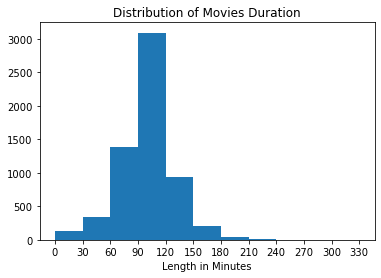

In [144]:
# plotting a histogram to see distribution of duration
bins = np.arange(0,df_movie.duration.max()+30,30)
labels = [v for v in bins]
plt.hist(df_movie.duration,bins=bins)
plt.xticks(labels)
plt.title('Distribution of Movies Duration')
plt.xlabel('Length in Minutes');

In [ ]:
# using a boxplot and violin plot to describe the distribution further


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!